# **DETAILS**





   **NAME** : R.SANJAY

   **EMAIL** : sanjay.r030303@gmail.com

**DOMAIN** : DataScience

 **INSTRUCTOR** : Sahil **Rahman**

**PROJECT TITLE** : Flower Recognition / Detection

# **IMPORTING LIBRARIES**

In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns  

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 

# PROBLEM STATEMENT
1. What's the ratio of Male to Female?
2. How many Males are married and non-married?
3. How many Females are married and non-married?
4. How many Males and Females are graduated and non-graduated with respect to their Marital status?
5. Which type of encoding will be required to perform on the "Education" column?
6. Is it a male or a female whose loan amount is the highest?
7. the specification and information about the applicant who has the highest income?
8. What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)
9. Which model are you going to choose and define the reason for going with the same model?
10. Have you performed the Hyper Parameter Tuning?
11. Compare the Actual results with the Predicted results
12. What's the accuracy of your model?
13. In order to improve the accuracy, what more approaches can be done?
14. What can you conclude with respect to the data?

# Defining and Importing the dataset

Tain Dataset : https://drive.google.com/file/d/1nf0VQUDLn19BCB9OXl2VdzzIelDTsSis/view?usp=share_link

Test Dataset : https://drive.google.com/file/d/1flNlE1vZ62yhEBDrGreSce2dxR7MC7K8/view?usp=share_link

In [846]:
df=  pd.read_csv("/content/Training Data.csv")

In [847]:
test = pd.read_csv("/content/Testing Data.csv")

EDA - Exploratory Data Analaysis

In [848]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [849]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [850]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [851]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [852]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [853]:
df.shape, test.shape

((614, 13), (367, 12))

Removing Loan_ID beacause it not going to help in analysis and prediction

In [854]:
df.drop("Loan_ID",axis=1,inplace=True)
test.drop("Loan_ID",axis=1,inplace=True)

In [855]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [856]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [857]:
# checking for Null and missing value and replace it with categorical missing values

In [858]:
df.Gender.isna().sum()

13

In [859]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [860]:
df.Gender = df.Gender.fillna(df['Gender'].mode()[0])

mode definition :
Mode is the value that appears the most in a set of values. Use the fillna() method and set the mode to fill missing columns with mode

In [861]:
df.Gender.isna().sum()

0

In [862]:
df.Married.isna().sum()

3

In [863]:
df.Married = df.Married.fillna(df['Married'].mode()[0])

In [864]:
df.Married.isna().sum()

0

In [865]:
df.Dependents.isna().sum()

15

In [866]:
df.Dependents = df.Dependents.fillna(df['Dependents'].mode()[0])

In [867]:
df.Dependents.isna().sum()

0

In [868]:

df.Education.isna().sum()

0

In [869]:
df.Self_Employed.isna().sum()

32

In [870]:
df.Self_Employed = df.Self_Employed.fillna(df['Dependents'].mode()[0])

In [871]:
df.Self_Employed.isna().sum()

0

In [872]:
df.ApplicantIncome.isna().sum()

0

In [873]:
df.CoapplicantIncome.isna().sum()	

0

In [874]:
df.LoanAmount.isna().sum()	

22

In [875]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode())

In [876]:
df.LoanAmount.isna().sum()	

21

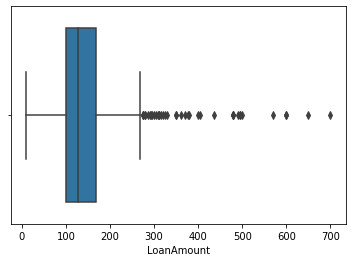

In [877]:
sns.boxplot(x="LoanAmount", data=df)

Here we can see that mean is affected with outliers so we can try with median

In [878]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [879]:
df.LoanAmount.isna().sum()	

0

In [880]:
# Now its clear

In [881]:
df.Loan_Amount_Term.isna().sum()	

14

In [882]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [883]:
df.Loan_Amount_Term.isna().sum()	

0

In [884]:

df.Credit_History.isna().sum()	

50

In [885]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [886]:

df.Credit_History.isna().sum()	

0

In [887]:

df.Property_Area.isna().sum()	

0

In [888]:
# null values are cleaned

In [889]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [890]:
df.isna().sum().sum()

0

In [891]:
#no more null values

In [892]:
# now wecan start encoding

In [893]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [894]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

# 1. What's the ratio of Male to Female?

In [895]:
df.Gender[df.Gender == "Male"].count() /  df.Gender[df.Gender == "Female"].count()


4.482142857142857

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



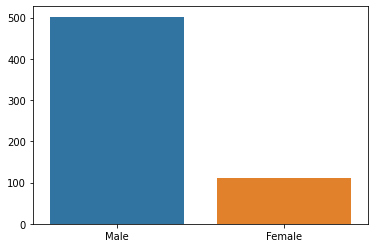

In [896]:
sns.barplot(['Male','Female'],df.Gender.value_counts().values)

In [897]:
df.Gender[df.Married == "Yes"].value_counts()

Male      369
Female     32
Name: Gender, dtype: int64

In [898]:
df.Gender[df.Married == "No"].value_counts()

Male      133
Female     80
Name: Gender, dtype: int64

# 2. How many Males are married and non-married?

**ANSWER** : The Number of Married Male is **369** and the number of Unmarried male is **133**



---







# 3. How many Females are married and non-married?

**ANSWER** : The Number of Married Female is **32** and the number of UnMarried Female is **80**


---



In [899]:
df.Gender[df.Education == "Graduate"].value_counts()

Male      388
Female     92
Name: Gender, dtype: int64

In [900]:
df.Gender[df.Education == "Not Graduate"].value_counts()

Male      114
Female     20
Name: Gender, dtype: int64

# 4. How many Males and Females are graduated and non-graduated with respect to their Marital status?

**ANSWER** :
There are  **388** Male and **92** Female are are graduated with respect to their Marital Status and There are**114** Male and **20** Female are are graduated with respect to their Marital Status 


---



# 5. Which type of encoding will be required to perform on the "Education" column?


In [901]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [902]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [903]:
df.Education = le.fit_transform(df.Education)

In [904]:
df.Education.value_counts()

0    480
1    134
Name: Education, dtype: int64

# 6. Is it a male or a female whose loan amount is the highest?

In [905]:
df.LoanAmount.nlargest()
# These are the Largest values

171    700.0
130    650.0
155    600.0
561    600.0
369    570.0
Name: LoanAmount, dtype: float64

In [906]:
# 700 is the toppest LoanAmount. So we going to print the gender who holding this LoanAmount
df.Gender[df.LoanAmount == 700]

171    Male
Name: Gender, dtype: object

**ANSWER** : Male's LoanAmount is highest

In [907]:
df.head(172)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,0,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Male,Yes,0,0,No,2439,3333.0,129.0,360.0,1.0,Rural,Y
168,Male,No,0,0,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
169,Male,Yes,2,0,No,8000,0.0,200.0,360.0,1.0,Semiurban,Y
170,Male,Yes,0,1,0,1820,1769.0,95.0,360.0,1.0,Rural,Y


# 7. the specification and information about the applicant who has the highest income?

**NOTE**: Here we have Two types of income
 1. 	ApplicantIncome
 2. CoApplicantIncome

 So we going to adding these 2 income to get a TOTAL INCOME


In [908]:
# total income = ApplicantIncome + CoapplicantIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [909]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,0,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [910]:
df.TotalIncome.max() #highest value

81000.0

In [911]:
df[df.TotalIncome == 81000.0]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
409,Male,Yes,3+,0,No,81000,0.0,360.0,360.0,0.0,Rural,N,81000.0


**ANSWER** : The above DETAILS are the specification and information about the applicant who has the highest income.


---



Before Going to the  next question first we have to encode the remaining columns


In [912]:
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)
df.Loan_Status = le.fit_transform(df.Loan_Status)

In [913]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,1,5849,0.0,120.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,1,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [914]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [915]:
#We have to clean the 3+ value
df['Dependents'].replace('3+', 3, inplace=True)

In [916]:
df.drop("ApplicantIncome", axis=1,inplace =True)
df.drop("CoapplicantIncome", axis=1,inplace =True)

In [917]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,1,120.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,1,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,2,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,1,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,1,141.0,360.0,1.0,2,1,6000.0
5,1,1,2,0,2,267.0,360.0,1.0,2,1,9613.0
6,1,1,0,1,1,95.0,360.0,1.0,2,1,3849.0
7,1,1,3,0,1,158.0,360.0,0.0,1,0,5540.0
8,1,1,2,0,1,168.0,360.0,1.0,2,1,5532.0
9,1,1,1,0,1,349.0,360.0,1.0,1,0,23809.0


In [918]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int64  
 9   Loan_Status       614 non-null    int64  
 10  TotalIncome       614 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 52.9+ KB


In [919]:
#changing the object to int
df['Dependents'] = df['Dependents'].astype(str).astype(int)

In [920]:
df.info() # now the value is changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int64  
 9   Loan_Status       614 non-null    int64  
 10  TotalIncome       614 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 52.9 KB




---



8. What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)

**ANSWER** : To know about what all features are we going to consider for the model training we have to do analysis like feature engineering, finding feature importance, data visualization like bar plot,scatterplot etc. These are all done in the upcoming sections

# **CONCULSION :**
from the upcoming prediction i found that random forest with hyperparametric tuning gives best accuracy for this model

HeatMap

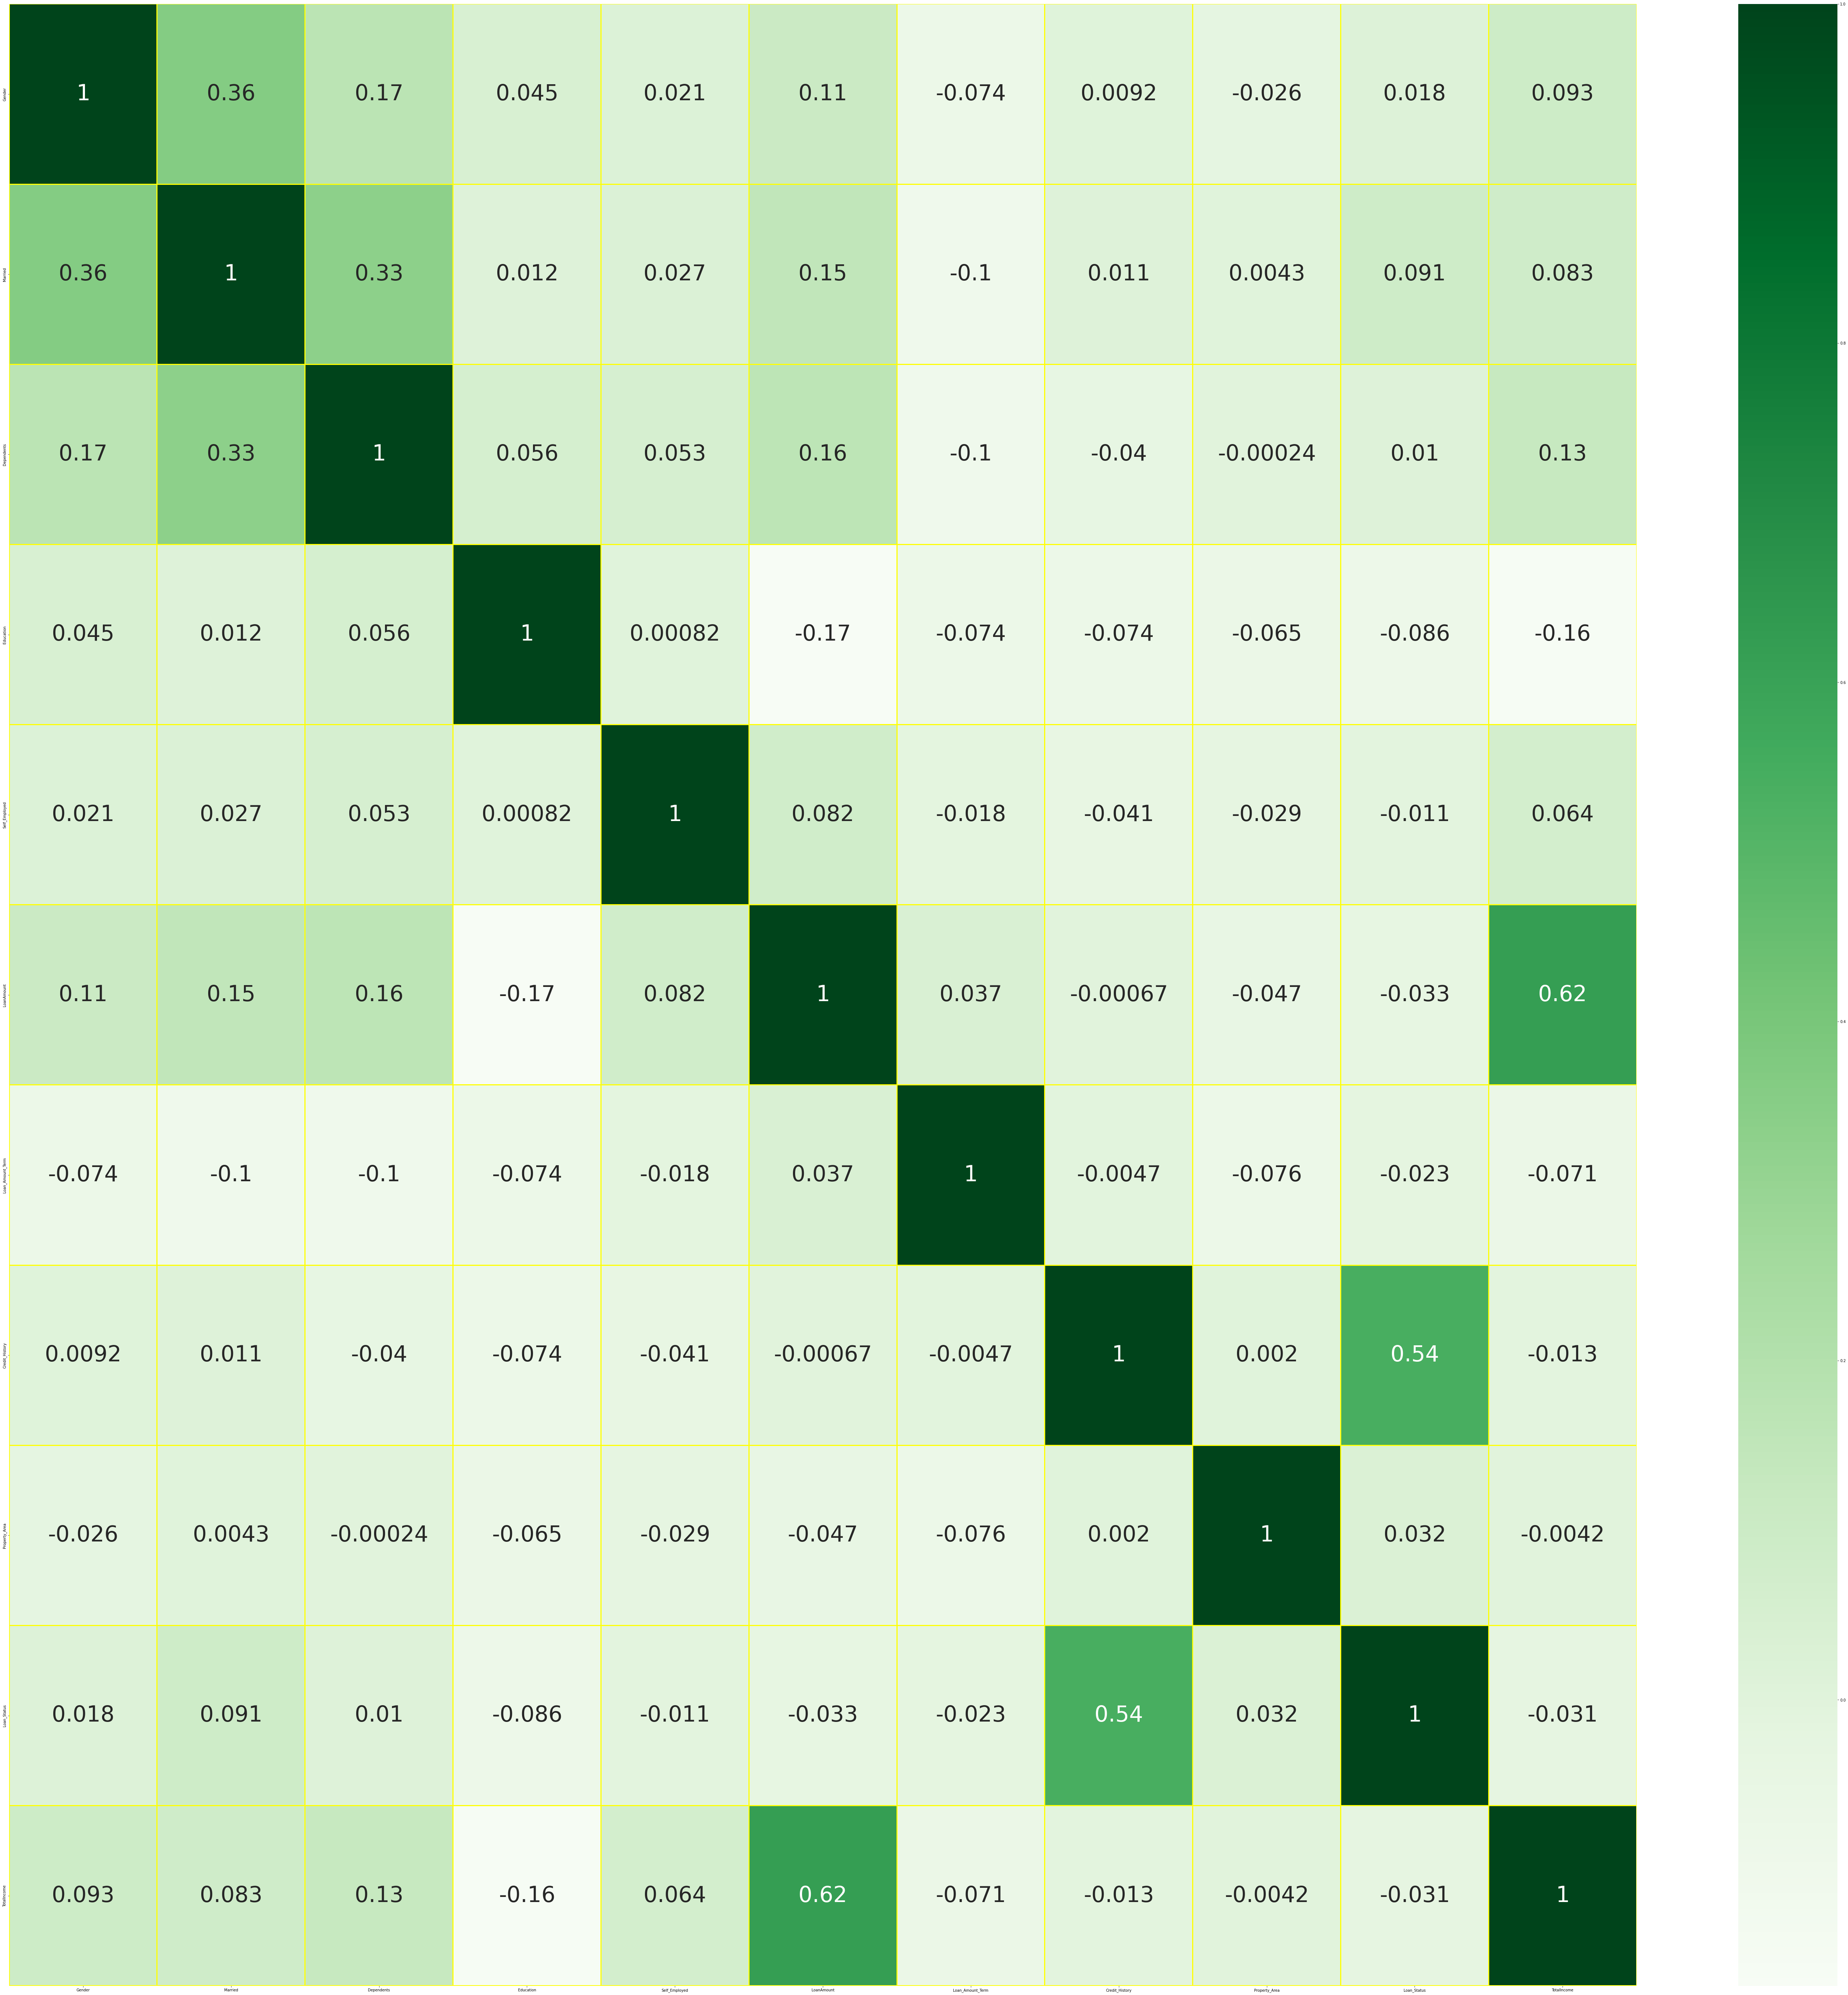

In [921]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(), annot=True,linewidths = 2,linecolor = "yellow", cmap='Greens',annot_kws={'size': 60})

Scatter Plot for  Gender


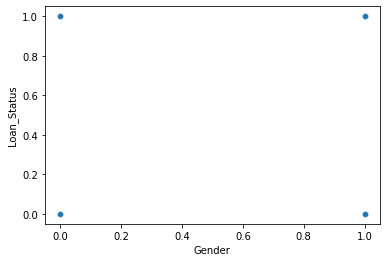

Scatter Plot for  Married


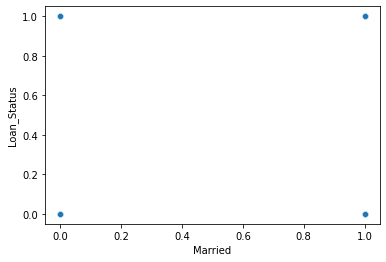

Scatter Plot for  Dependents


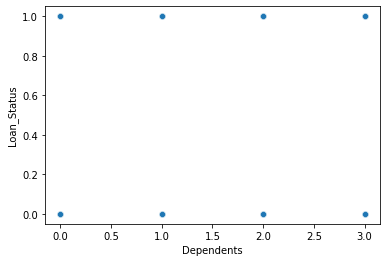

Scatter Plot for  Education


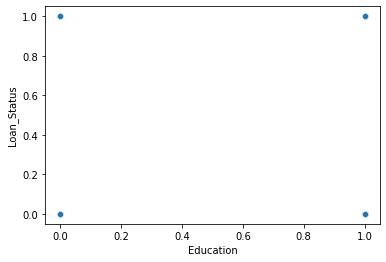

Scatter Plot for  Self_Employed


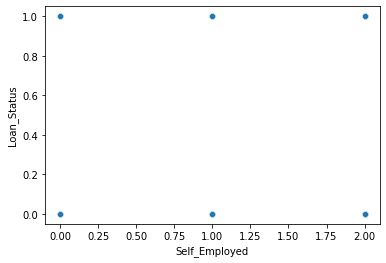

Scatter Plot for  LoanAmount


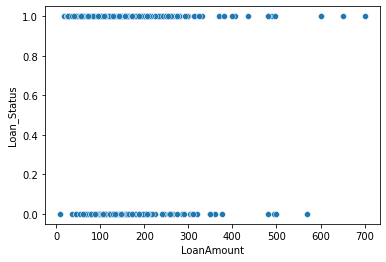

Scatter Plot for  Loan_Amount_Term


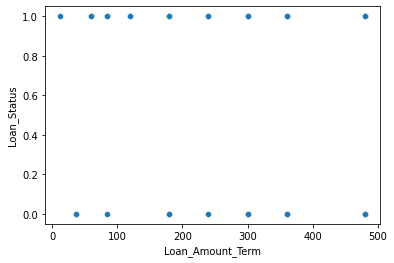

Scatter Plot for  Credit_History


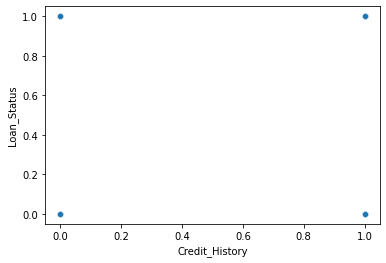

Scatter Plot for  Property_Area


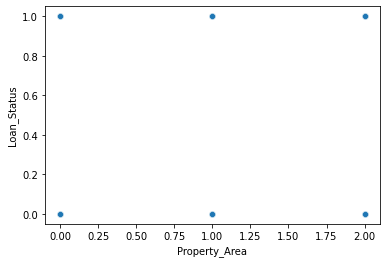

Scatter Plot for  TotalIncome


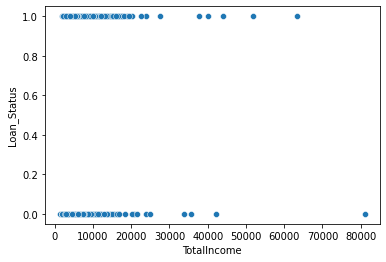

In [922]:
for i in df.drop('Loan_Status',axis=1).columns:
    
    print("Scatter Plot for ",i)
    sns.scatterplot(x = df[i], y = df['Loan_Status'])
    plt.show()
  

BarPlot w.r.t to target

Box Plot for  Gender


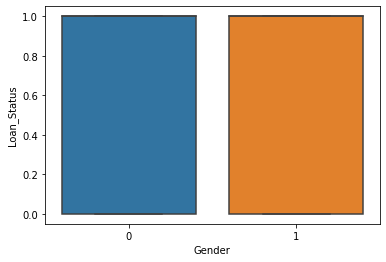

----------------------------------------------------------------------------------------------------
Box Plot for  Married


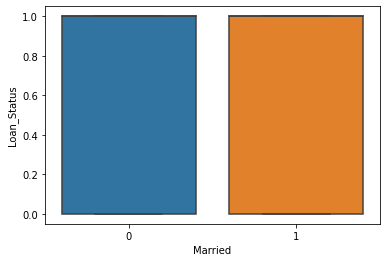

----------------------------------------------------------------------------------------------------
Box Plot for  Dependents


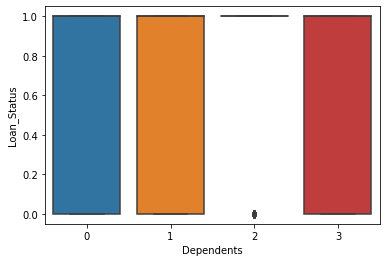

----------------------------------------------------------------------------------------------------
Box Plot for  Education


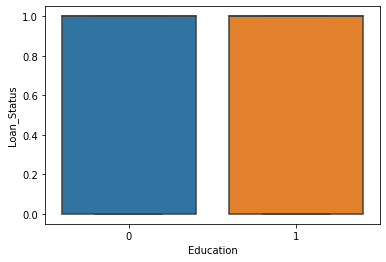

----------------------------------------------------------------------------------------------------
Box Plot for  Self_Employed


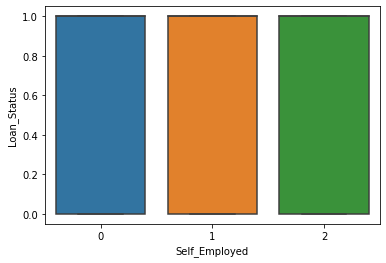

----------------------------------------------------------------------------------------------------
Box Plot for  LoanAmount


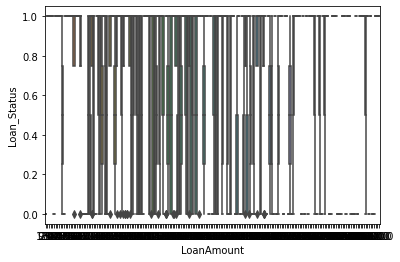

----------------------------------------------------------------------------------------------------
Box Plot for  Loan_Amount_Term


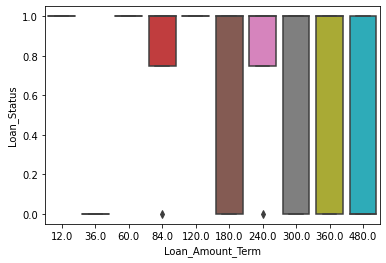

----------------------------------------------------------------------------------------------------
Box Plot for  Credit_History


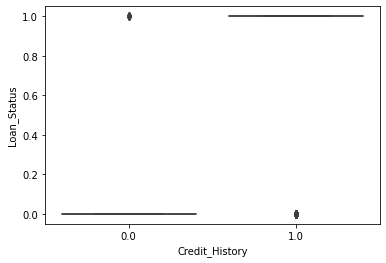

----------------------------------------------------------------------------------------------------
Box Plot for  Property_Area


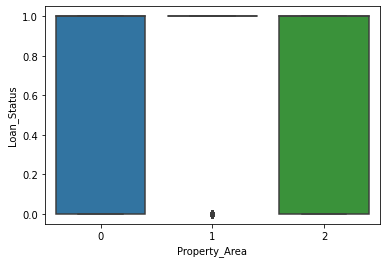

----------------------------------------------------------------------------------------------------
Box Plot for  TotalIncome


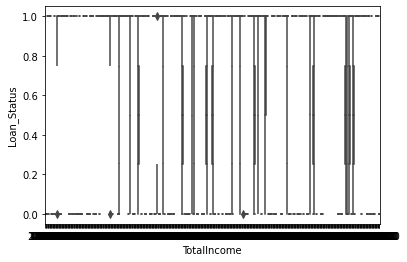

----------------------------------------------------------------------------------------------------


In [923]:
for i in df.drop('Loan_Status',axis=1).columns:
    print("Box Plot for ",i)
    sns.boxplot(x = df[i], y = df['Loan_Status'])
    plt.show()
    print('-'*100)

Implot

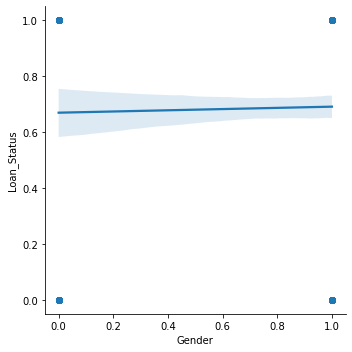

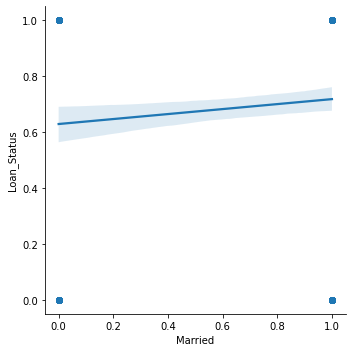

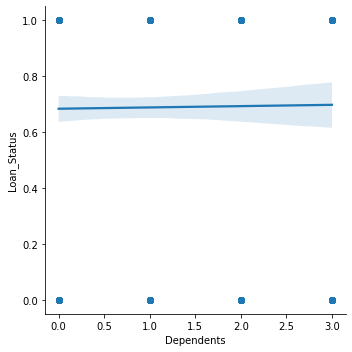

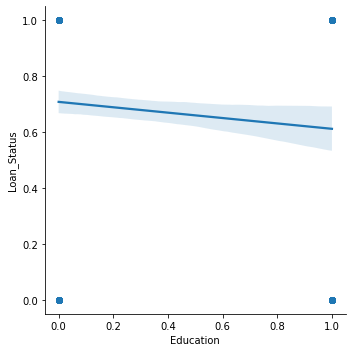

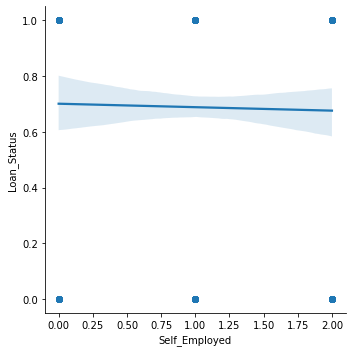

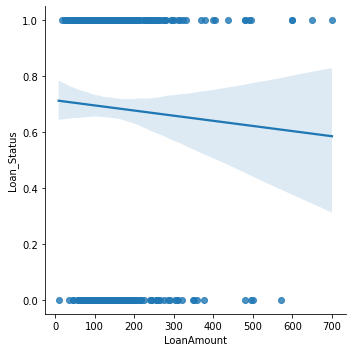

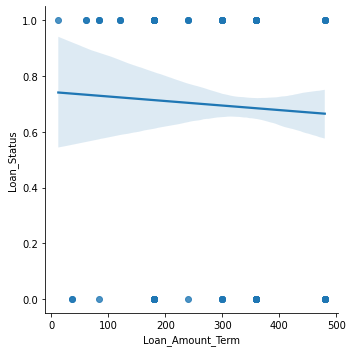

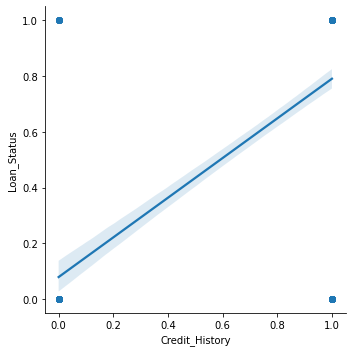

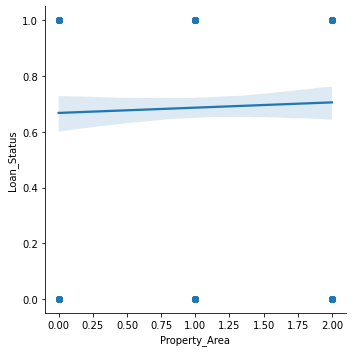

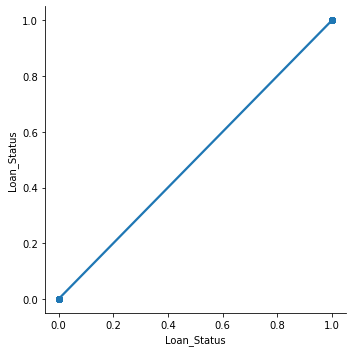

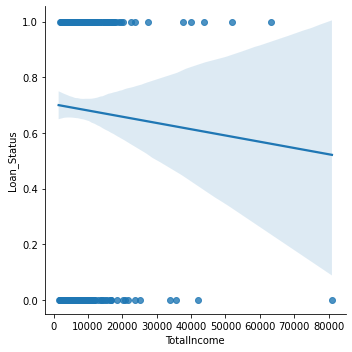

In [924]:
for col in df.columns: 
    if df[col].dtypes != 'object':
        sns.lmplot(data = df, x = col, y = 'Loan_Status')

In [925]:
X = df.drop("Loan_Status",axis=1)
y= df.Loan_Status

In [926]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,1,120.0,360.0,1.0,2,5849.0
1,1,1,1,0,1,128.0,360.0,1.0,0,6091.0
2,1,1,0,0,2,66.0,360.0,1.0,2,3000.0
3,1,1,0,1,1,120.0,360.0,1.0,2,4941.0
4,1,0,0,0,1,141.0,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,71.0,360.0,1.0,0,2900.0
610,1,1,3,0,1,40.0,180.0,1.0,0,4106.0
611,1,1,1,0,1,253.0,360.0,1.0,2,8312.0
612,1,1,2,0,1,187.0,360.0,1.0,2,7583.0


In [927]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Feature importance using ExtraTreeClassifier

In [928]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [929]:
model.feature_importances_

array([0.02380318, 0.02166816, 0.06421104, 0.01943196, 0.04058221,
       0.22419951, 0.04727318, 0.28451432, 0.04742101, 0.22689543])

In [930]:
important_features = pd.Series(model.feature_importances_,
                               index = X.columns)

In [931]:
important_features

Gender              0.023803
Married             0.021668
Dependents          0.064211
Education           0.019432
Self_Employed       0.040582
LoanAmount          0.224200
Loan_Amount_Term    0.047273
Credit_History      0.284514
Property_Area       0.047421
TotalIncome         0.226895
dtype: float64

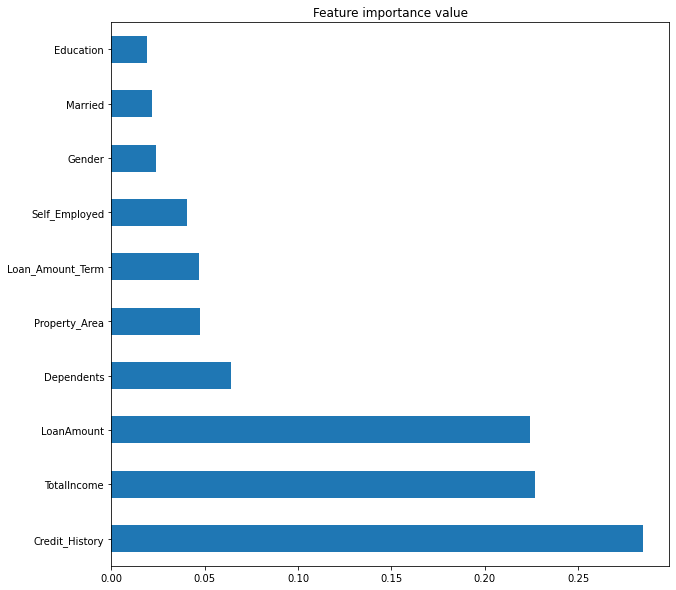

In [932]:
plt.figure(figsize=(10,10))
plt.title("Feature importance value")
important_features.nlargest(20).plot(kind='barh')

9. Which model are you going to choose and define the reason for going with the same model?

ANSWER : Here iam going to choose randomforest,logisticRegression,DecisionTreeClassifier and compare these 3 performance metric. Based on  the higher performance metrics i will tell which model is best for this Dataset 

#**Train-Test Split**

In [933]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [934]:
names, accuracy, cross_v = [], [], []


# **LogisticRegression**

In [935]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

accuracy_lr = lr_model.score(x_test,y_test)*100
print("Accuracy of model is",accuracy_lr)
score = cross_val_score(lr_model,X,y,cv=5)
cv_lr = np.mean(score)*100
print("Cross Validation is",cv_lr)

#model Comparision
names.append("Logistic Regression")
accuracy.append(accuracy_lr)
cross_v.append(cv_lr)

Accuracy of model is 78.86178861788618
Cross Validation is 80.62108489937359


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

# **DecisionTree**

In [936]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

accuracy_dt = dt_model.score(x_test,y_test)*100
print("Accuracy of model is",accuracy_dt)
score = cross_val_score(dt_model,X,y,cv=5)
cv_dt = np.mean(score)*100
print("Cross Validation is",cv_dt)

#model Comparision
names.append("DecisionTree")
accuracy.append(accuracy_dt)
cross_v.append(cv_dt)

Accuracy of model is 65.04065040650406
Cross Validation is 68.24070371851259


# **RandomForestClassifier without hyperParametricTunning**

In [937]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

accuracy_rf = rf_model.score(x_test,y_test)*100
print("Accuracy of model is",accuracy_rf)
score = cross_val_score(rf_model,X,y,cv=5)
cv_rf = np.mean(score)*100
print("Cross Validation is",cv_rf)

#model Comparision
names.append("RandomForest without HPT")
accuracy.append(accuracy_rf)
cross_v.append(cv_rf)

Accuracy of model is 77.23577235772358
Cross Validation is 77.5276556044249


# **10. Have you performed the Hyper Parameter Tuning?**

ANSWER : yes , see the below code

In [938]:

hpt_model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
hpt_model.fit(x_train,y_train)

accuracy_hpt = hpt_model.score(x_test,y_test)*100
print("Accuracy of model is",accuracy_hpt)
score = cross_val_score(hpt_model,X,y,cv=5)
cv_hpt = np.mean(score)*100
print("Cross Validation is",cv_hpt)

#model Comparision
names.append("RandmForest with HPT")
accuracy.append(accuracy_hpt)
cross_v.append(cv_hpt)

Accuracy of model is 78.86178861788618
Cross Validation is 80.78368652538984


# **Confusion Matrix**

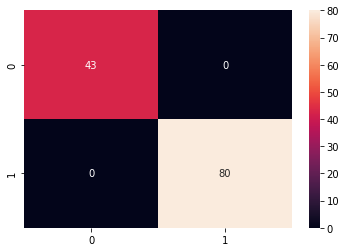

In [939]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)

# **11. Compare the Actual results with the Predicted results?**

ANSWER : given below


LogisticRegression

In [940]:
lr_pred = lr_model.predict(x_test)
lr_df = pd.DataFrame({"Actual": y_test,
                         "Predicted": lr_pred})
print(lr_df.head(90))

     Actual  Predicted
350       1          1
377       1          1
163       1          1
609       1          1
132       1          1
..      ...        ...
327       1          1
570       1          1
589       0          0
6         1          1
284       0          1

[90 rows x 2 columns]


# **DecisionTree**

In [941]:
dt_pred = dt_model.predict(x_test)
dt_df = pd.DataFrame({"Actual": y_test,
                         "Predicted": dt_pred})
print(dt_df.head(90))

     Actual  Predicted
350       1          1
377       1          1
163       1          1
609       1          0
132       1          1
..      ...        ...
327       1          1
570       1          1
589       0          0
6         1          1
284       0          1

[90 rows x 2 columns]


# **RandomForest without HyperParametric Tuning**

In [942]:
rf_pred = rf_model.predict(x_test)
rf_df = pd.DataFrame({"Actual": y_test,
                         "Predicted": rf_pred})
print(rf_df.head(90))

     Actual  Predicted
350       1          1
377       1          1
163       1          1
609       1          1
132       1          1
..      ...        ...
327       1          1
570       1          1
589       0          0
6         1          1
284       0          1

[90 rows x 2 columns]


# **RandomForest  with  HyperParametric Tuning**

In [943]:
hpt_pred = hpt_model.predict(x_test)
hpt_df = pd.DataFrame({"Actual": y_test,
                         "Predicted": hpt_pred})
print(hpt_df.head(90))

     Actual  Predicted
350       1          1
377       1          1
163       1          1
609       1          1
132       1          1
..      ...        ...
327       1          1
570       1          1
589       0          0
6         1          1
284       0          1

[90 rows x 2 columns]


# **12. What's the accuracy of your model?**


In [944]:
result_accuracy = pd.DataFrame([accuracy_rf,accuracy_hpt, accuracy_dt, accuracy_lr],['random forest with hyperparametric tuning','random forest without hyperparametric tuning', 'decision tree', 'logistic regression'])

In [945]:
result_accuracy

,0
random forest with hyperparametric tuning,77.235772
random forest without hyperparametric tuning,78.861789
decision tree,65.040650
logistic regression,78.861789


In [946]:
result_cv = pd.DataFrame([cv_rf,cv_hpt,cv_dt, cv_lr],['random forest with hyperparametric tuning','random forest without hyperparametric tuning', 'decision tree', 'logistic regression'])

In [947]:
result_cv

,0
random forest with hyperparametric tuning,77.527656
random forest without hyperparametric tuning,80.783687
decision tree,68.240704
logistic regression,80.621085


# **13. In order to improve the accuracy, what more approaches can be done?**

ANSWER : Iam Done HyperParametricTuning, Feature Engineering,finding Feature importance, Use Various Algorithm to get a highest accuracy model

# **14. What can you conclude with respect to the data?**

ANSWER : here i have concluded that the above data is cleaned and model is sussefully predicted and getting better accuracy

In [952]:
import pickle
file = 'model.pkl'
with open(file,'wb') as f:
  pickle.dump(rf_model,f)